In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import requests
import statsmodels.tsa.stattools as ts 
from statsmodels.tsa.vector_ar.vecm import coint_johansen

## Part 1: check cointegration for different futures of the same commodity (calendar spread)

#### Crude Oil

In [2]:
crude = pd.read_csv('Crude_Oil.txt', sep="\t")
crude['Date']=pd.to_datetime(crude['Date'], dayfirst=True) 
# Set ending date for cointegration analysis
EndDate = '2013-02-18'
crude = crude.loc[crude['Date'] < '2013-02-18']
# Set index and drop col 'LLCC12' due to 1220+ null value
crude.set_index('Date', inplace=True)
crude.drop(columns=['LLCC12'], inplace=True)
# Normalize prices by first value
crude_norm = crude.divide(crude.iloc[0])

In [3]:
# Plot of normalized price of futures
def plot_norm(df,name):
    plt.figure(figsize = (15, 10))
    plt.plot(df)
    plt.xlabel('days')
    plt.title('Performance of {}'.format(name))
    plt.legend(df.columns)
    plt.show()

In [4]:
# check for cointegration of each pair of product combination
def cointegration(df):
    col = df.columns.tolist()
    p_value=[]
    pair=[]
    for a1 in range(len(col)-1):
        for a2 in range(a1+1,len(col)):
            # p_value for test of cointegration for each pair
            # get the intersection of index (date)
            index1 = df[[col[a1]]].dropna().index
            index2 = df[[col[a2]]].dropna().index
            index_int = index1.intersection(index2)
            result = ts.coint(df.loc[index_int,col[a1]], df.loc[index_int,col[a2]])[1]
            p_value.append(result)
            pair.append('{}-{}'.format(col[a1],col[a2]))
            
    df_coin = pd.DataFrame({'pair':pair,
                           'p_value': p_value})
    
    # select statistically significant cointegrated pairs
    df_coin_sig = df_coin.loc[df_coin.p_value<0.01,:].sort_values(by='p_value').reset_index(drop=True)
    return df_coin_sig

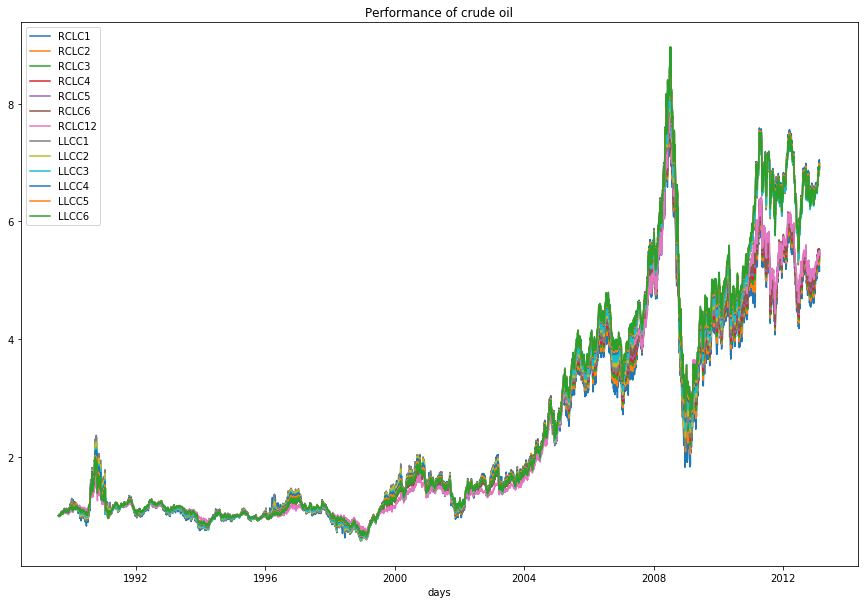

In [5]:
plot_norm(crude_norm, 'crude oil')

In [6]:
crude_coin_sig = cointegration(crude_norm)

In [7]:
crude_coin_sig

,pair,p_value
0,RCLC1-RCLC2,4.462825e-08
1,RCLC1-RCLC4,3.553073e-06
2,RCLC1-RCLC3,1.019330e-05
3,RCLC1-RCLC5,1.116847e-05
4,RCLC1-RCLC6,2.584517e-05
5,LLCC1-LLCC2,5.244676e-05
6,RCLC2-RCLC4,9.484033e-05
7,RCLC2-RCLC5,1.980429e-04
8,RCLC2-RCLC3,2.028618e-04
9,RCLC3-RCLC4,2.416658e-04


### Gasoline

In [8]:
gas = pd.read_csv('Gasoline.txt', sep="\t")
gas['Date']=pd.to_datetime(gas['Date'], dayfirst=True) 
# Set ending date for cointegration analysis
EndDate = '2013-02-18'
gas = gas.loc[gas['Date'] < '2013-02-18']
# Set index 
gas.set_index('Date', inplace=True)

# Normalize prices by first value
gas_norm = gas.divide(gas.iloc[0])

FileNotFoundError: [Errno 2] File Gasoline.txt does not exist: 'Gasoline.txt'

In [ ]:
plot_norm(gas_norm, 'gasoline')

In [ ]:
gas_coin_sig = cointegration(gas_norm)

In [ ]:
gas_coin_sig

### Heating Oil

In [154]:
heat = pd.read_csv('Heating_Oil.txt', sep="\t")
heat['Date']=pd.to_datetime(head['Date'], dayfirst=True)
# Set ending date for cointegration analysis
EndDate = '2013-02-18'
heat = heat.loc[heat['Date'] < '2013-02-18']
#Keep useful columns
heat = heat.iloc[:,:13]
# Set index 
heat.set_index('Date', inplace=True)

# Normalize prices by first value
heat_norm = heat.divide(heat.iloc[0])

In [155]:
heat

,HOTC1,HOTC2,HOTC3,HOTC4,HOTC5,HOTC6,HOTC7,HOTC8,HOTC9,HOTC10,HOTC11,HOTC12
Date,,,,,,,,,,,,
1986-01-01,0.8055,0.7835,0.7336,0.6850,0.6511,0.6400,0.6375,0.6345,0.6380,0.6560,0.6560,0.6720
1986-01-02,0.7522,0.7136,0.6650,0.6311,0.6200,0.6175,0.6145,0.6180,0.6180,0.6560,0.6560,0.6720
1986-01-03,0.7494,0.7149,0.6731,0.6422,0.6280,0.6220,0.6200,0.6230,0.6230,0.6230,0.6390,0.6720
1986-01-06,0.7673,0.7349,0.6930,0.6590,0.6420,0.6350,0.6325,0.6350,0.6350,0.6230,0.6390,0.6720
1986-01-07,0.7567,0.7257,0.6825,0.6465,0.6300,0.6230,0.6210,0.6230,0.6230,0.6230,0.6390,0.6720
...,...,...,...,...,...,...,...,...,...,...,...,...
2013-02-11,3.2315,3.2112,3.2479,3.2147,3.1958,3.1806,3.1685,3.1586,3.1507,3.1442,3.1375,3.1261
2013-02-12,3.2362,3.2184,3.2577,3.2247,3.2062,3.1918,3.1806,3.1715,3.1642,3.1583,3.1520,3.1410
2013-02-13,3.2188,3.2056,3.2528,3.2222,3.2047,3.1906,3.1793,3.1694,3.1607,3.1532,3.1459,3.1344


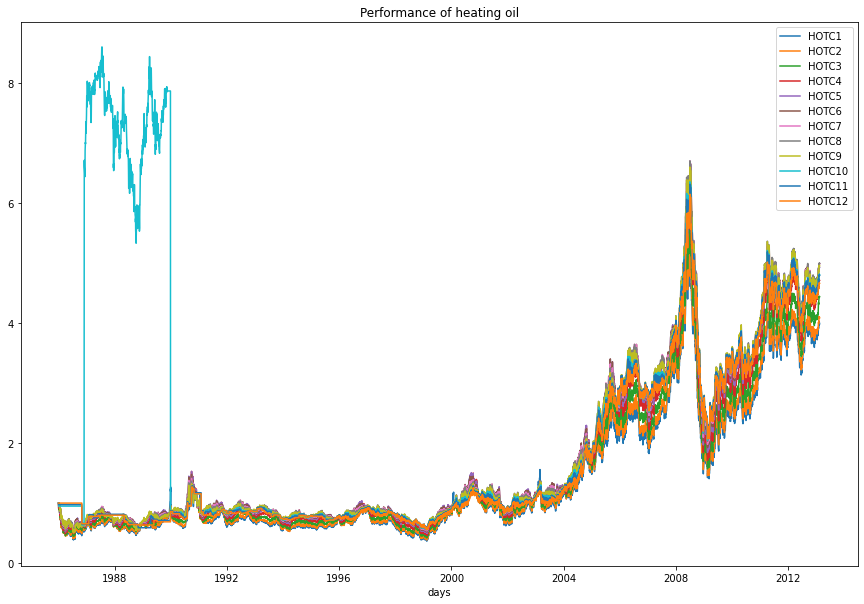

In [156]:
plot_norm(heat_norm, 'heating oil')

In [157]:
heat_coin_sig = cointegration(heat_norm)

In [158]:
heat_coin_sig

,pair,p_value
0,HOTC6-HOTC8,9.708978e-16
1,HOTC7-HOTC9,1.545849e-15
2,HOTC5-HOTC7,7.766670e-15
3,HOTC6-HOTC9,9.658594e-15
4,HOTC5-HOTC8,7.799043e-14
5,HOTC4-HOTC6,1.278958e-13
6,HOTC6-HOTC7,3.892162e-13
7,HOTC4-HOTC7,4.006040e-13
8,HOTC7-HOTC8,1.057877e-12
9,HOTC5-HOTC9,1.707183e-12


### Natual Gas

In [159]:
natural = pd.read_csv('Natural_Gas.txt', sep="\t")
natural['Date']=pd.to_datetime(natural['Date'], dayfirst=True)
# Set ending date for cointegration analysis
EndDate = '2013-02-18'
natural = natural.loc[natural['Date'] < '2013-02-18']
# Set index 
natural.set_index('Date', inplace=True)

# Normalize prices by first value
natural_norm = natural.divide(natural.iloc[0])

In [160]:
natural_norm

,NGHenry,NNGC1,NNGC2,NNGC3,NNGC4,NNGC5,NNGC6,NNGC7,NNGC8,NNGC9,NNGC10,NNGC11,NNGC12
Date,,,,,,,,,,,,,
1990-08-13,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1990-08-14,1.000000,0.988396,0.996835,0.994624,0.997701,0.997817,1.002427,1.004494,0.997059,1.005952,1.000000,1.000000,1.000000
1990-08-15,1.000000,0.974744,0.974684,0.978495,0.989885,0.992140,1.000000,1.000000,0.994118,1.005952,1.000000,1.000000,1.000000
1990-08-16,1.000000,0.976109,0.977848,0.981183,1.000000,1.002183,1.009709,1.011236,1.000000,1.011905,1.000000,1.000000,1.000000
1990-08-17,1.000000,0.982935,0.990506,0.996774,1.012874,1.013100,1.024272,1.028090,1.008824,1.020833,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-02-11,2.318841,2.238225,2.117722,1.836559,1.599080,1.544541,1.728641,2.004494,2.118824,2.217262,2.339286,2.386391,2.374706
2013-02-12,2.391304,2.204778,2.086076,1.808602,1.573333,1.519651,1.700971,1.972472,2.085882,2.184524,2.308929,2.356805,2.345882
2013-02-13,2.384058,2.256655,2.133544,1.847849,1.605977,1.548908,1.733010,2.008989,2.124118,2.220833,2.341667,2.389349,2.377647


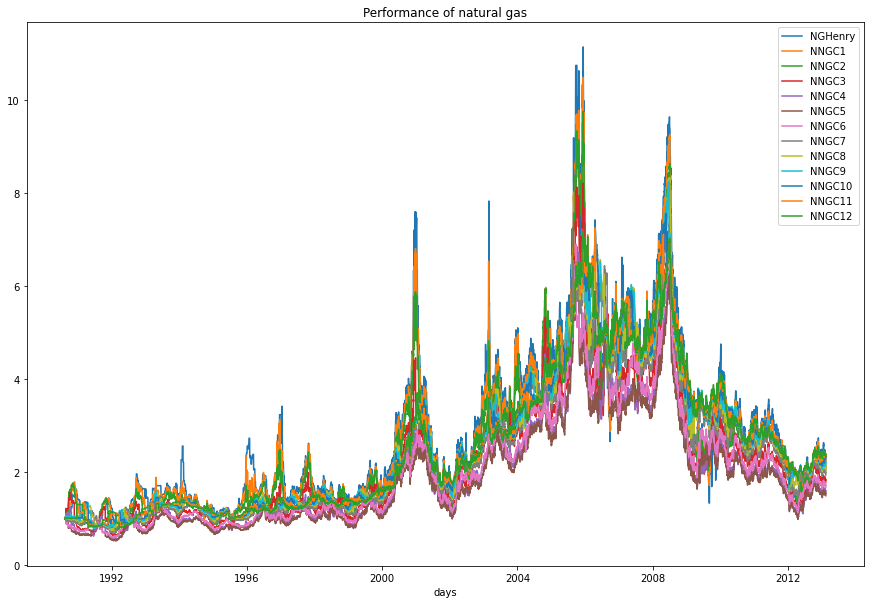

In [161]:
plot_norm(natural_norm, 'natural gas')

In [162]:
natural_coin_sig = cointegration(natural_norm)

In [163]:
natural_coin_sig

,pair,p_value
0,NNGC8-NNGC10,5.224255e-20
1,NNGC10-NNGC12,5.398425e-20
2,NNGC8-NNGC11,5.889671e-20
3,NNGC9-NNGC11,5.983037e-20
4,NNGC6-NNGC9,4.187123e-19
...,...,...
73,NGHenry-NNGC11,5.353593e-06
74,NNGC1-NNGC12,6.912854e-06
75,NGHenry-NNGC8,7.847545e-06
76,NGHenry-NNGC7,8.373180e-06


## Part 2: check cointegration of front-month future between different commodities

In [164]:
# set start date as '1991-01-01' to include sample periods of unified length for all assets except for Gasoline 
StartDate = '1991-01-01'
Index = crude_norm.index[crude_norm.index>=StartDate]
front = pd.DataFrame(index=Index)
front['crude'] = crude_norm['RCLC1']
front['gas'] = gas_norm['RBC1']
front['heat'] = heat_norm['HOTC1']
front['natural'] = natural_norm['NNGC1']

In [165]:
front

,crude,gas,heat,natural
Date,,,,
1991-01-01,1.529855,NaN,1.009435,1.331058
1991-01-02,1.424960,NaN,0.909994,1.250512
1991-01-03,1.370629,NaN,0.872005,1.216382
1991-01-04,1.339430,NaN,0.847921,1.189761
1991-01-07,1.487359,NaN,0.945624,1.218430
...,...,...,...,...
2013-02-11,5.219473,1.599534,4.011794,2.238225
2013-02-12,5.245293,1.614941,4.017629,2.204778
2013-02-13,5.218397,1.607052,3.996027,2.256655


In [166]:
cointegration(front)

,pair,p_value
0,gas-heat,0.005612
